# 2주차 과제

## 붓꽃 데이터 분류

In [248]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [268]:
# 데이터 로드
file_path = "C:/Users/ckstn/OneDrive/바탕 화면/iris.csv"
df = pd.read_csv(file_path)

# 데이터 분할 (입력 데이터와 라벨 분리)
y = df["Name"]  # 출력 데이터 (라벨)
X = df.drop(columns=["Name"])  # 입력 데이터 (특성)

# 문자열 클래스 라벨을 숫자로 변환
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 변환한 후 덮어쓰지 않음!

# 데이터 분할 (학습 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (SVM, KNN, LR에 유리)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [270]:
# Decision Tree 분류
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree 정확도: {dt_accuracy:.4f}")

Decision Tree 정확도: 1.0000


In [272]:
# Random Forest 분류
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest 정확도: {rf_accuracy:.4f}")

Random Forest 정확도: 1.0000


In [274]:
# SVM 분류
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
svm_pred = svm_clf.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM 정확도: {svm_accuracy:.4f}")

SVM 정확도: 1.0000


In [276]:
# Logistic Regression 분류
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)
lr_pred = lr_clf.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression 정확도: {lr_accuracy:.4f}")

Logistic Regression 정확도: 1.0000


In [278]:
# KNN 알고리즘 적용
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN 정확도: {knn_accuracy:.4f}")

KNN 정확도: 1.0000


In [280]:
# 예측값과 정답 비교
comparison_df = pd.DataFrame({"정답": y_test, "예측값": knn_pred})
print("\n예측값 vs 정답 비교")
print(comparison_df.head())


예측값 vs 정답 비교
   정답  예측값
0   1    1
1   0    0
2   2    2
3   1    1
4   1    1


In [282]:
# 여러 K 값에 대해 정확도 확인
k_values = range(1, 21)  # 1부터 20까지의 K 값
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

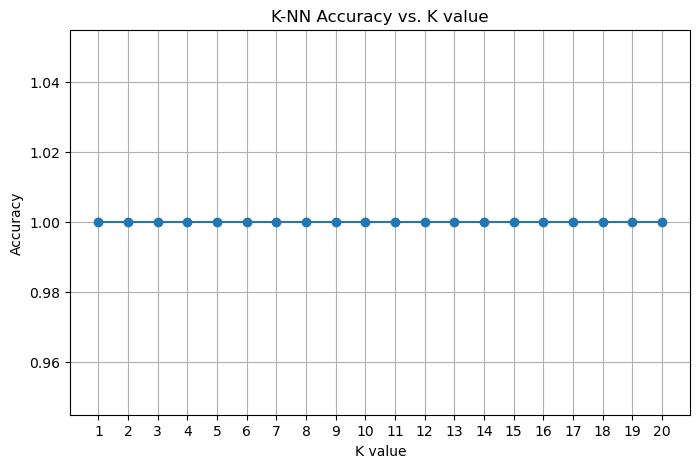

In [284]:
# 정확도를 그래프로 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K-NN Accuracy vs. K value')
plt.xticks(k_values)
plt.grid()
plt.show()